In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data_cleansed.csv')

In [2]:
df.head()

,hotel_name,review,address,prices,location,cleanliness,service,value
0,The Papandayan,5.0,"Jl. Gatot Subroto 83, Bandung 40262 Indonesia",661922,4.5,4.5,4.7,4.6
1,The Gaia Hotel Bandung,5.0,"No. 430 Jl. Dr. Setiabudi, Bandung 40143 Indon...",1110455,4.9,4.8,4.9,4.9
2,Janevalla Bandung,4.5,"Jalan Aceh No. 65, Jawa Barat, Bandung 40115 I...",758694,4.7,4.6,4.6,4.5
3,Grand Tjokro Premiere Bandung,4.5,"Jl. Cihampelas no. 211-217, Bandung 40131 Indo...",505393,4.5,4.4,4.4,4.4
4,Swiss-Belresort Dago Heritage,5.0,Lapangan Golf Dago Atas No. 78 Dago Heritage G...,619111,4.8,4.3,4.6,4.6


<Axes: >

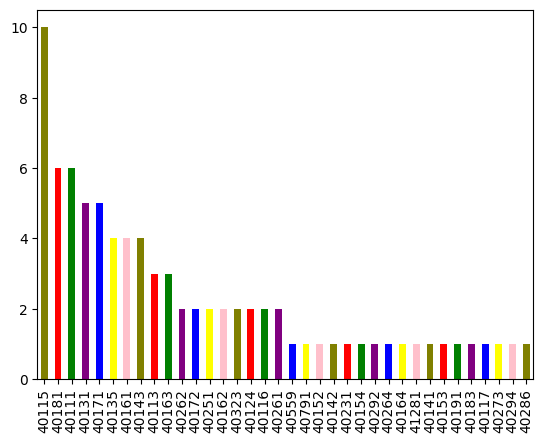

In [50]:
def postcode(s):
  s['address'] = s['address'].split(',')[-1]
  s['address'] = s['address'].split(' ')[2]
  return s

df = df.apply(postcode , axis = 1)
df = df[df.address != 'Indonesia']
df['address'].value_counts().plot.bar(color=['olive', 'red', 'green', 'purple', 'blue','yellow','pink'])

In [55]:
df2 = df.loc[df['address'] == '40115']
df2['points'] = ((df2['review']*10) + ((1000000-df2['prices'])/20000))
df2.loc[df2['points'].idxmax()]

<ipython-input-55-18084ced0d8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['points'] = ((df2['review']*10) + ((1000000-df2['prices'])/20000))


hotel_name      Tebu Hotel Bandung
review                         4.5
address                      40115
prices                      238969
location                       4.4
cleanliness                    4.0
service                        3.9
value                          4.3
points                    83.05155
Name: 12, dtype: object

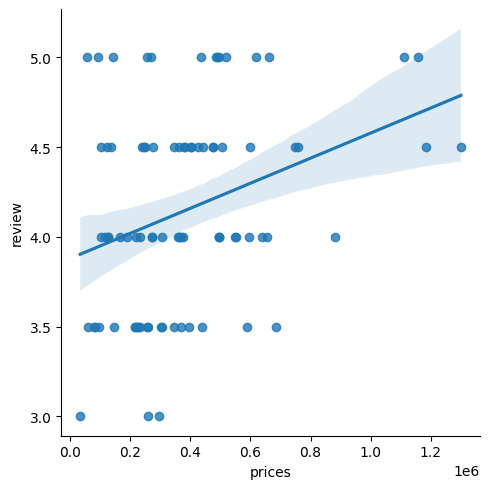

In [57]:
df3 = df
sns.lmplot(x="prices", y="review", data=df3);